In [2]:
! pip install tqdm


Defaulting to user installation because normal site-packages is not writeable


In [5]:
from tqdm import tqdm
import time

# 假设我们有一个总迭代次数
total_iterations = 100

# 初始化进度条
pbar = tqdm(total=total_iterations, desc="Processing", unit="iteration")

# 初始化计数器
counter = 0

# 模拟一个 while 循环
while counter < total_iterations:
    # 模拟一些计算或操作
    time.sleep(1)  # 模拟耗时操作
    
    # 更新计数器
    counter += 1
    
    # 更新进度条
    pbar.update(1)
    pbar.set_postfix({"Current Iteration": counter})

# 关闭进度条
pbar.close()

Processing:  15%|█▌        | 15/100 [00:15<01:25,  1.00s/iteration, Current Iteration=15]

KeyboardInterrupt: 

In [63]:
import torch
def svd_batch(matrix,k=None):
    U, S, V = torch.svd(matrix)
    
    
    "soft make"
    a=torch.diag_embed(S)
    s_temp=torch.zeros_like(a)
    s_temp[:,:,k-1:,k-1:]=a[:,:,k-1:,k-1:]
    
    # reconstructed_matrix = torch.matmul(torch.matmul(U,torch.diag_embed(S)) , V.transpose(2,3))
    
    reconstructed_matrix = torch.matmul(torch.matmul(U,s_temp) , V.transpose(2,3))
    
    return reconstructed_matrix

# 当 k=1时 为origin_image
def svd_batch_one(matrix,k=None):
    U, S, V = torch.svd(matrix)
    
    
    "soft make"
    a=torch.diag_embed(S)
    s_temp=torch.zeros_like(a)
    s_temp[:,:,k-1:k,k-1:k]=a[:,:,k-1:k,k-1:k]
    
    # reconstructed_matrix = torch.matmul(torch.matmul(U,torch.diag_embed(S)) , V.transpose(2,3))
    
    reconstructed_matrix = torch.matmul(torch.matmul(U,s_temp) , V.transpose(2,3))
    
    return reconstructed_matrix


In [13]:
c=[1,2]
c[0:1]

[1]

In [88]:
matrix = torch.randn(2,3,128,128)
c=svd_batch(matrix,1)

from torch.nn import functional as F
z=F.mse_loss(c,matrix).item()
print(z)

1.1699902114845062e-12


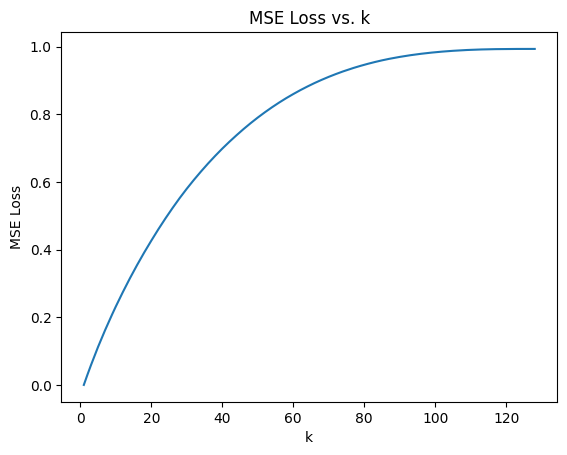

In [101]:
z_values = []
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
# 使用 for 循环记录 z 的值
for k in range(1, 129):
    c = svd_batch(matrix, k)
    z = F.mse_loss(c, matrix)
    
    z_values.append(z.item())

#使用 matplotlib 显示 z 的值
plt.plot(range(1, 129), z_values)
plt.xlabel('k')
plt.ylabel('MSE Loss')
plt.title('MSE Loss vs. k')
plt.show()


In [98]:
z_values[0]

IndexError: list index out of range

In [155]:

def svd_batch_accmulate(matrix,k=0):
    U, S, V = torch.svd(matrix)
    
    
    """
    func_desc:
        累加k对应的recon
        svd_batch_accmulate(martix,k=0) 返回原图 
        k=2 return sigma[k:]
    """
    a=torch.diag_embed(S)
    s_temp=torch.zeros_like(a)
    s_temp[:,:,k:,k:]=a[:,:,k:,k:]
    # [k,-1]
    # reconstructed_matrix = torch.matmul(torch.matmul(U,torch.diag_embed(S)) , V.transpose(2,3))
    
    reconstructed_matrix = torch.matmul(torch.matmul(U,s_temp) , V.transpose(2,3))
    
    return reconstructed_matrix
# 当 k=0时 为origin_image

def svd_batch_one(matrix,k=None):
    U, S, V = torch.svd(matrix)
    
    
    """
    func_desc:
        只添加单个k对应的accmulate
    """
    a=torch.diag_embed(S)
    s_temp=torch.zeros_like(a)
    s_temp[:,:,k:k+1,k:k+1]=a[:,:,k:k+1,k:k+1]
    # one by one
    # reconstructed_matrix = torch.matmul(torch.matmul(U,torch.diag_embed(S)) , V.transpose(2,3))
    
    reconstructed_matrix = torch.matmul(torch.matmul(U,s_temp) , V.transpose(2,3))
    
    return reconstructed_matrix







t=3
matrix=torch.randn(3,1,128,128)
svd_batch_one(matrix,2)
    
    
    
# z_values = []
# c=torch.zeros_like(matrix)
# # 使用 for 循环记录 z 的值
# for k in reversed(range(0, 128)):
#     c += svd_batch_one(matrix, k)
#     z = F.mse_loss(c, matrix)
    
#     z_values.append(z.item())

# #使用 matplotlib 显示 z 的值
# plt.plot(z_values[::-1])
# plt.xlabel('k')
# plt.ylabel('MSE Loss')
# plt.title('MSE Loss vs. k')
# plt.show()

U shape: torch.Size([3, 1, 128, 128])
S shape: torch.Size([3, 1, 128])
V shape: torch.Size([3, 1, 128, 128])
a shape: torch.Size([3, 1, 128, 128])
s_temp shape before assignment: torch.Size([3, 1, 128, 128])
s_temp shape after assignment: torch.Size([3, 1, 128, 128])
reconstructed_matrix shape: torch.Size([3, 1, 128, 128])


tensor([[[[-0.2694,  0.1994,  0.1258,  ..., -0.0782, -0.0660,  0.0932],
          [-0.6829,  0.5055,  0.3190,  ..., -0.1983, -0.1673,  0.2363],
          [-0.0557,  0.0412,  0.0260,  ..., -0.0162, -0.0136,  0.0193],
          ...,
          [-0.0442,  0.0327,  0.0207,  ..., -0.0128, -0.0108,  0.0153],
          [-0.0252,  0.0186,  0.0118,  ..., -0.0073, -0.0062,  0.0087],
          [ 0.3680, -0.2724, -0.1719,  ...,  0.1069,  0.0902, -0.1273]]],


        [[[ 0.0916, -0.1479,  0.0493,  ..., -0.1480,  0.2324,  0.2790],
          [ 0.1090, -0.1759,  0.0587,  ..., -0.1761,  0.2765,  0.3319],
          [-0.0046,  0.0074, -0.0025,  ...,  0.0074, -0.0116, -0.0139],
          ...,
          [ 0.0130, -0.0210,  0.0070,  ..., -0.0210,  0.0329,  0.0395],
          [-0.1961,  0.3166, -0.1056,  ...,  0.3169, -0.4976, -0.5974],
          [-0.0394,  0.0636, -0.0212,  ...,  0.0636, -0.0999, -0.1200]]],


        [[[-0.0033,  0.0117,  0.0153,  ...,  0.0053,  0.0020, -0.0168],
          [ 0.0476, -0.167

In [196]:
def svd_batch_one(matrix,k=None):
    U, S, V = torch.svd(matrix)
    
    
    """
    Perform SVD reconstruction for each batch element with a specified k value.
    
    Parameters:
    - matrix: Input batch matrix of shape (batch_size, m, n).
    - k: A list or tensor of k values for each batch element. If None, use all singular values.
    
    Returns:
    - reconstructed_matrix: Reconstructed batch matrix of shape (batch_size, m, n).
    """
    batch_size=matrix.shape[0]
    recon=[]
    
    for i in range(batch_size):
        
        a=torch.diag_embed(S[i])
       
        s_temp=torch.zeros_like(a)
        s_temp[:,k[i]:k[i]+1,k[i]:k[i]+1]=a[:,k[i]:k[i]+1,k[i]:k[i]+1]
        recon.append(torch.matmul(torch.matmul(U[i],s_temp) , V[i].transpose(-1,-2)))
        
    reconstructed_matrix=torch.stack(recon,0)
    print(reconstructed_matrix.shape)
    return reconstructed_matrix

In [211]:
def svd_batch_accmulate(matrix, k=None):
    U, S, V = torch.svd(matrix)
    
    """
    func_desc:
        累加k对应的recon
        svd_batch_accmulate(matrix, k=0) 返回原图 
        k=2 return sigma[k:]
    """
    batch_size = matrix.shape[0]
    recon = []
    
    for i in range(batch_size):
        a = torch.diag_embed(S[i])
        s_temp = torch.zeros_like(a)
        
        # 如果 k 是 None，则使用所有奇异值
        if k is None:
            s_temp = a
        else:
            s_temp[:, k[i]:, k[i]:] = a[:, k[i]:, k[i]:]
        
        recon.append(torch.matmul(torch.matmul(U[i], s_temp), V[i].transpose(-1, -2)))
    
    reconstructed_matrix = torch.stack(recon, 0)
    return reconstructed_matrix

# 示例
matrix = torch.randn(3,3, 3, 3)
k = torch.randint(0, 3, (3,)).long()  # 每个批次中不同的 k 值

reconstructed_matrix = svd_batch_accmulate(matrix, k)
print(reconstructed_matrix)

tensor([[[[ 8.5905e-01,  7.5854e-01,  4.6476e-01],
          [ 4.5475e-01,  2.9338e-01,  5.3535e-01],
          [-4.2001e-01, -3.2040e-01, -3.6222e-01]],

         [[-1.2168e-01, -2.4754e-01, -1.2587e-01],
          [-7.9917e-01, -1.5011e-01, -4.2725e-01],
          [-1.3698e+00, -8.2673e-02, -6.8503e-01]],

         [[ 3.9579e-01,  7.4549e-01, -8.7145e-01],
          [ 3.2275e-01,  1.9211e-01, -6.0847e-01],
          [-7.5488e-02,  7.8274e-02,  1.1204e-01]]],


        [[[ 1.5688e-02, -5.6401e-02, -2.0028e-02],
          [-3.6989e-02,  1.3298e-01,  4.7222e-02],
          [ 2.9565e-02, -1.0629e-01, -3.7744e-02]],

         [[ 2.4574e-01, -1.3230e-01,  5.6832e-01],
          [-4.0420e-02,  2.1762e-02, -9.3482e-02],
          [ 8.3108e-02, -4.4745e-02,  1.9221e-01]],

         [[ 9.3491e-02, -2.9519e-02,  4.9530e-02],
          [-2.3826e-01,  7.5227e-02, -1.2622e-01],
          [ 3.2161e-02, -1.0155e-02,  1.7038e-02]]],


        [[[-1.9092e+00, -2.4028e-01,  7.0480e-01],
          [ 1.1

In [224]:
t = torch.randint(0, 1, (3,)).long()
print(t)
c=torch.randn(3,3,3,3)

z=svd_batch_accmulate(c,t)


print(z-c)

tensor([0, 0, 0])
tensor([[[[ 5.9605e-08, -1.1921e-07, -5.9605e-08],
          [ 1.1921e-07,  1.1921e-07,  5.9605e-08],
          [ 3.3528e-08, -1.1921e-07, -1.4901e-08]],

         [[ 1.1921e-07,  4.1723e-07, -4.7684e-07],
          [-2.3842e-07, -5.9605e-07,  4.7684e-07],
          [ 3.5763e-07,  7.1526e-07, -1.1921e-07]],

         [[ 0.0000e+00,  1.1921e-07, -1.6391e-07],
          [ 3.5763e-07,  5.9605e-07, -1.7136e-07],
          [ 5.9605e-08,  2.1979e-07, -4.7684e-07]]],


        [[[ 2.3842e-07, -3.8743e-07,  5.9605e-08],
          [ 0.0000e+00,  1.1921e-07, -2.3842e-07],
          [ 0.0000e+00,  9.5367e-07, -1.4901e-08]],

         [[-5.9605e-07, -1.1921e-07,  3.5763e-07],
          [-2.9802e-07,  4.7684e-07, -2.3842e-07],
          [-9.5367e-07, -2.9802e-07,  5.9605e-07]],

         [[-1.4901e-07, -3.5763e-07, -2.2352e-08],
          [-2.9802e-08,  1.6391e-07, -2.3842e-07],
          [-4.7684e-07,  2.3842e-07, -1.7881e-07]]],


        [[[ 1.4901e-07, -1.1921e-07, -2.3842e-07